In [72]:
%matplotlib inline

In [73]:
import matplotlib.pyplot as plt
import nbodykit.lab as nb
import numpy as np

No handles with labels found to put in legend.


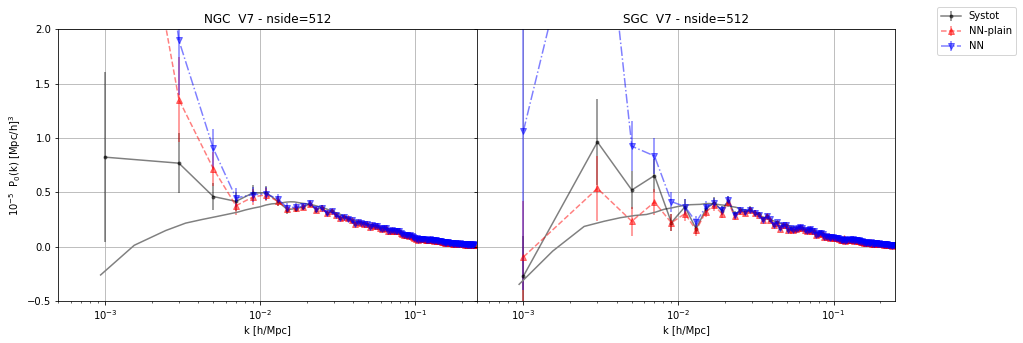

In [85]:
c   = ['k', 'r', 'b', 'purple', 'orange', 'olive']
ls  = ['-', '--', '-.', ':', '-', '--']
mk  = ['.', '^', 'v', 'x', 'o', 's']
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey='row', sharex=True)
plt.subplots_adjust(hspace=0., wspace=0)
ax = ax.flatten()
# ax = [ax]

for j,CAP in enumerate(['NGC', 'SGC']): # 'sgc'
    path = '/home/mehdi/data/eboss/v7/results_'+CAP+'_all/'
    wsystot      = nb.ConvolvedFFTPower.load(path + 'pk_'+CAP+'_v7_512.json')
    wnnzab       = nb.ConvolvedFFTPower.load(path + 'pk_'+CAP+'_v7_wnnz_ab_512.json')
    wnnzp       = nb.ConvolvedFFTPower.load(path + 'pk_'+CAP+'_v7_wnnz_plain_512.json')    
    #nocorrection = nb.ConvolvedFFTPower.load(path + 'pk_'+CAP+'_v7_wosys_512.json')
    #pks = [nocorrection,    wsystot,  wnnzab, wnnzp]
    #ttl = ['No correction', 'Systot', 'NN', 'NN wo FS']
    pks = [wsystot, wnnzp, wnnzab]
    ttl = ['Systot', 'NN-plain', 'NN']

    for i,data in enumerate(pks):  
        #print('k', np.diff(data.poles['k']))
        
        err = 1.e-5*data.poles['power_0'].real/(0.5*data.poles['modes'])**0.5
        ax[j].errorbar(data.poles.coords['k'], 1.e-5*(data.poles['power_0'].real-data.attrs['shotnoise']),
                       yerr=err,
                   label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.5)
        #ax[j].plot(data.poles['k'], 1.e-5*(data.poles['power_0'].real-data.attrs['shotnoise']),
        #          label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.8)
    #for i,data in enumerate(pks):    
    #    ax[2+j].errorbar(data.poles['k'], 1.e-5*data.poles['power_2'].real,
    #                label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.8)        
    # j = 0, 1
    Pkmock = np.loadtxt('/home/mehdi/data/eboss/v5/Power_Spectrum_DR16QSO_'+CAP+'_av.txt', usecols=(0, 1))
    ax[j].plot(Pkmock[:, 0], 1.e-5*Pkmock[:, 1], c='grey')
    ax[j].set_xscale('log')
    #ax[j].set_yscale('log')
    ax[j].set_xlabel(r'k [h/Mpc]')
    ax[j].set_ylim(-0.5, 2.)
    ax[j].set_xlim(0.0005, 0.25)
    #ax[2+j].set_ylim(-3, 1)
    #ax[2+j].set_xlabel(r'k [h/Mpc]')
    ax[j].set_title(CAP + '  V7 - nside=512')
    if j==0:
        ax[j].set_ylabel(r'10$^{-5}$  P$_{0}$(k) [Mpc/h]$^{3}$')
        #ax[2+j].set_ylabel(r'10$^{-5}$ P$_{2}$(k) [Mpc/h]$^{3}$')
    #if j == 1:ax[j].legend(bbox_to_anchor=(1.1, 1.1))
    ax[1].legend(bbox_to_anchor=(1.3, 1.1))
#fig.delaxes(ax[1])
#fig.delaxes(ax[3])

for a in ax:a.grid()
fig.align_labels()   
#plt.savefig('P0_P2.pdf', bbox_inches='tight')

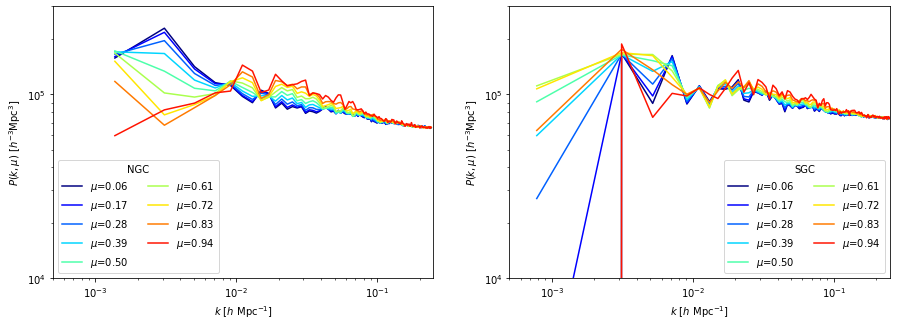

In [98]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
for j,CAP in enumerate(['NGC', 'SGC']):    
    #CAP = 'SGC'
    path = '/home/mehdi/data/eboss/v7/results_'+CAP+'_all/'
    wnnzp = nb.ConvolvedFFTPower.load(path + 'pk_'+CAP+'_v7_512.json') 
    # use the same number of mu wedges and number of multipoles
    Nmu = 9
    mu_edges = np.linspace(0., 1., Nmu+1, endpoint=True)
    #mu_edges = np.array([0., 0.5, 1.0])
    # get a BinnedStatistic holding the P(k,mu) wedges
    Pkmu = wnnzp.to_pkmu(mu_edges, 4)
    # plot each mu bin
    for i in range(Pkmu.shape[1]):
        Pk = Pkmu[:,i] # select the ith mu bin
        label = r'$\mu$=%.2f' % (Pkmu.coords['mu'][i])
        ax[j].loglog(Pk['k'], (Pk['power'].real-0.0*Pk.attrs['shotnoise']), label=label, 
                  color=plt.cm.jet(i/9))

    # format the axes
    ax[j].legend(title=CAP, loc=0, ncol=2)
    ax[j].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
    ax[j].set_ylabel(r"$P(k, \mu)$ [$h^{-3}\mathrm{Mpc}^3$]")
    ax[j].set_xlim(0.0005, 0.25)
    ax[j].set_ylim(1.e4,   3.e5)

Swap weights

In [1]:
from eboss_tools import swap_weights_plain

In [2]:
swap_weights_plain()

writing /home/mehdi/data/eboss/v7/eBOSS_QSO_clustering_NGC_v7_wnnz_plain.dat.fits
going to read /home/mehdi/data/eboss/v7/eBOSS_QSO_clustering_NGC_v7.dat.fits


/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


# NaN  (before) :  5
# NaNs (after)  :  0
number of objs w zcut [0.8, 1.1423845339193297] : 43641
# NaN  (before) :  9
# NaNs (after)  :  0
number of objs w zcut [1.1423845339193297, 1.3862779004064971] : 43640
# NaN  (before) :  5
# NaNs (after)  :  0
number of objs w zcut [1.3862779004064971, 1.632250262399963] : 43640
# NaN  (before) :  9
# NaNs (after)  :  0
number of objs w zcut [1.632250262399963, 1.8829689752636356] : 43640
# NaN  (before) :  4
# NaNs (after)  :  0
number of objs w zcut [1.8829689752636356, 2.2] : 43641

writing /home/mehdi/data/eboss/v7/eBOSS_QSO_clustering_SGC_v7_wnnz_plain.dat.fits
going to read /home/mehdi/data/eboss/v7/eBOSS_QSO_clustering_SGC_v7.dat.fits
# NaN  (before) :  9
# NaNs (after)  :  0
number of objs w zcut [0.8, 1.1423845339193297] : 24452
# NaN  (before) :  4
# NaNs (after)  :  0
number of objs w zcut [1.1423845339193297, 1.3862779004064971] : 24483
# NaN  (before) :  4
# NaNs (after)  :  0
number of objs w zcut [1.3862779004064971, 1.632250262

In [1]:
from eboss_tools import swap_weights

camb is not installed!


In [2]:
swap_weights()

writing /home/mehdi/data/eboss/v7/eBOSS_QSO_clustering_NGC_v7_wnnz_ab.dat.fits
going to read /home/mehdi/data/eboss/v7/eBOSS_QSO_clustering_NGC_v7.dat.fits


/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


# NaN  (before) :  5
# NaNs (after)  :  0
number of objs w zcut [0.8, 1.1423845339193297] : 43641
# NaN  (before) :  9
# NaNs (after)  :  0
number of objs w zcut [1.1423845339193297, 1.3862779004064971] : 43640
# NaN  (before) :  5
# NaNs (after)  :  0
number of objs w zcut [1.3862779004064971, 1.632250262399963] : 43640
# NaN  (before) :  9
# NaNs (after)  :  0
number of objs w zcut [1.632250262399963, 1.8829689752636356] : 43640
# NaN  (before) :  4
# NaNs (after)  :  0
number of objs w zcut [1.8829689752636356, 2.2] : 43641

writing /home/mehdi/data/eboss/v7/eBOSS_QSO_clustering_SGC_v7_wnnz_ab.dat.fits
going to read /home/mehdi/data/eboss/v7/eBOSS_QSO_clustering_SGC_v7.dat.fits
# NaN  (before) :  9
# NaNs (after)  :  0
number of objs w zcut [0.8, 1.1423845339193297] : 24452
# NaN  (before) :  4
# NaNs (after)  :  0
number of objs w zcut [1.1423845339193297, 1.3862779004064971] : 24483
# NaN  (before) :  4
# NaNs (after)  :  0
number of objs w zcut [1.3862779004064971, 1.632250262399

The maps that were selected with the feature selection

In [ ]:
from eboss_tools import plot_ablation_selected

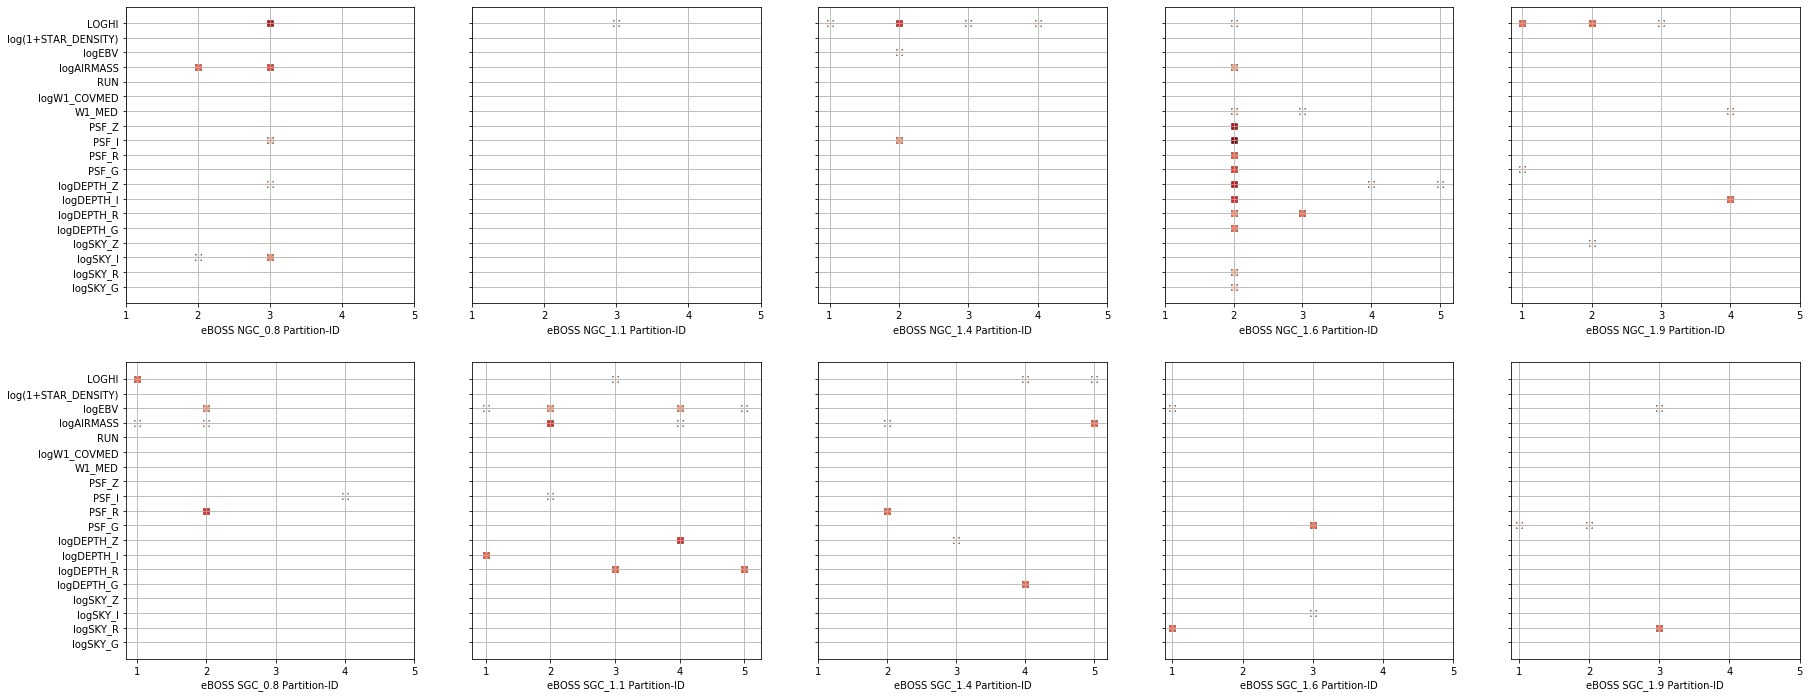

In [3]:
plot_ablation_selected()

Look at the systematic maps. Transform them if neccessary.

In [2]:
from eboss_tools import plot_systematics

camb is not installed!


NRAN                 : 1.240e-01: [ 1. 16. 18. 46.]
logSKY_G             : 1.129e+00: [0.007368   0.1655104  0.2251832  2.71619482]
logSKY_R             : 6.483e-01: [0.35571572 0.55714844 0.61075915 1.50107209]
logSKY_I             : 3.775e-01: [0.5516097  0.82946881 0.89600244 1.51065466]
logSKY_Z             : 1.894e-01: [0.91550494 1.30661456 1.38765673 1.91316324]
logAIRMASS           : 1.167e+00: [2.51587262e-04 3.33102125e-02 6.34653828e-02 3.05749494e-01]
logEBV               : 4.759e-02: [-2.53751565 -1.70031572 -1.50369735 -0.31112111]
logDEPTH_G           : 5.825e-01: [-0.82474691 -0.36988325 -0.31017295  0.46535627]
logDEPTH_R           : 5.058e-01: [-0.67007341 -0.2043695  -0.14487591  0.41176705]
logDEPTH_I           : 3.419e-01: [0.12445794 0.58713429 0.64574622 1.10610297]
logDEPTH_Z           : 3.772e-01: [-0.37902307 -0.01746411  0.04219972  0.49484253]
PSF_G                : 9.186e-01: [0.51376152 1.29309559 1.42585059 3.35971422]
PSF_R                : 7.701e-01: [0

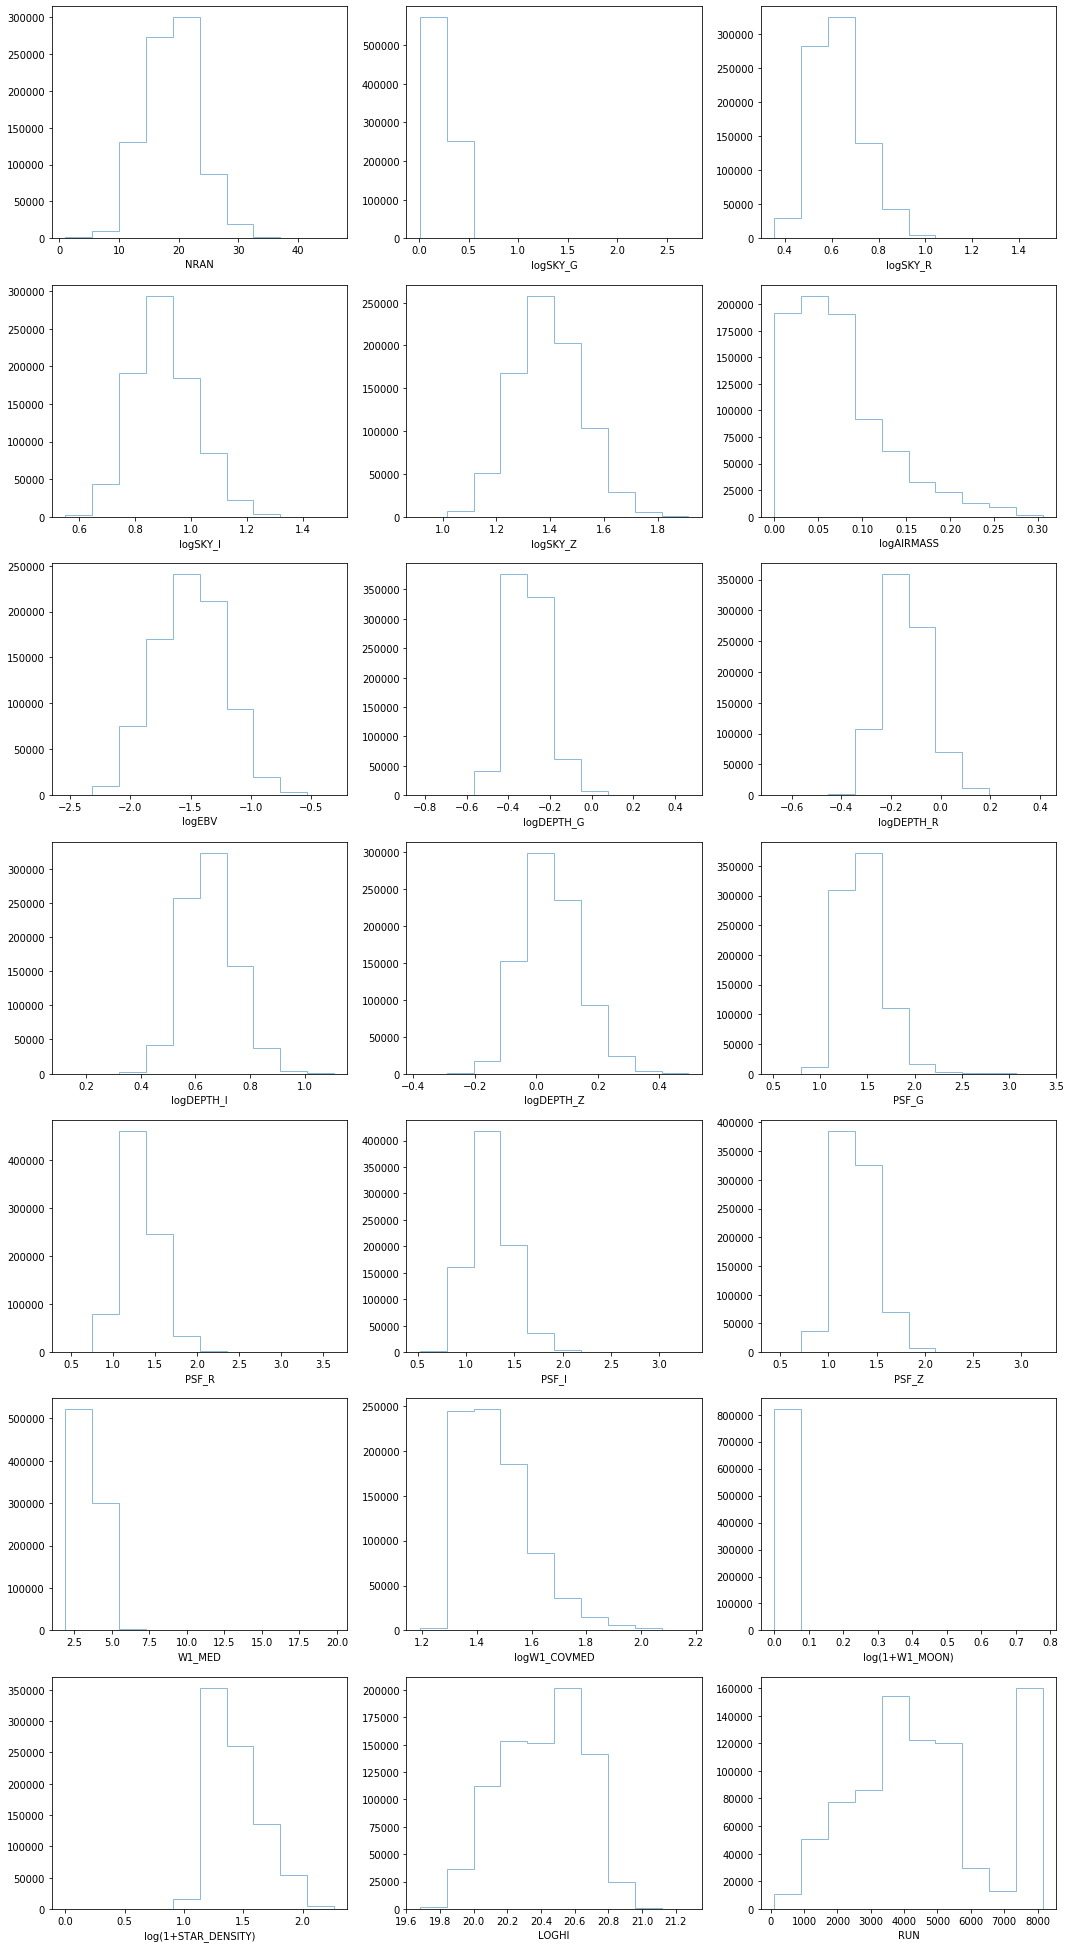

In [3]:
transformed = plot_systematics(return_pd=True)

In [7]:
transformed.dropna().describe().T

,count,mean,std,min,25%,50%,75%,max
NRAN,824348.0,18.590074,4.400665,1.000000,16.000000,18.000000,21.000000,46.000000
logSKY_G,824348.0,0.236139,0.095965,0.007368,0.165510,0.225183,0.297027,2.716195
logSKY_R,824348.0,0.627192,0.102451,0.355716,0.557148,0.610759,0.689592,1.501072
logSKY_I,824348.0,0.904801,0.108459,0.551610,0.829469,0.896002,0.971758,1.510655
logSKY_Z,824348.0,1.392139,0.123745,0.915505,1.306615,1.387657,1.471742,1.913163
logAIRMASS,824348.0,0.074560,0.055134,0.000252,0.033310,0.063465,0.099112,0.305749
logEBV,824348.0,-1.503546,0.278852,-2.537516,-1.700316,-1.503697,-1.307105,-0.311121
logDEPTH_G,824348.0,-0.305261,0.090360,-0.824747,-0.369883,-0.310173,-0.251259,0.465356
logDEPTH_R,824348.0,-0.138621,0.091267,-0.670073,-0.204370,-0.144876,-0.082707,0.411767
logDEPTH_I,824348.0,0.652093,0.091672,0.124458,0.587134,0.645746,0.710832,1.106103


In [5]:
#transformed.to_hdf('/home/mehdi/data/eboss/sysmaps/SDSS_WISE_imageprop_HI_transformed_nside512.h5', 
#                   'maps')

Split into 5 folds, 4 redshifts

In [1]:
from eboss_tools import preparev7

camb is not installed!


In [2]:
preparev7()

len of gal cats 1
num of gal obj 218202
going to apply z-cuts : [0.8, 1.1423845339193297]
num of gal obj after cut 43641
projecting into a healpix map with nside of 512
len of gal cats 1
num of gal obj 5550232
projecting into a healpix map with nside of 512
wrote /home/mehdi/data/eboss/v7/ngal_features_NGC_0.8.hp512.fits
wrote /home/mehdi/data/eboss/v7/mask_NGC_0.8.hp512.fits
wrote /home/mehdi/data/eboss/v7/frac_NGC_0.8.hp512.fits
wrote /home/mehdi/data/eboss/v7/ngal_features_NGC_0.8.hp512.5r.npy
len of gal cats 1
num of gal obj 218202
going to apply z-cuts : [1.1423845339193297, 1.3862779004064971]
num of gal obj after cut 43640
projecting into a healpix map with nside of 512
len of gal cats 1
num of gal obj 5550232
projecting into a healpix map with nside of 512
wrote /home/mehdi/data/eboss/v7/ngal_features_NGC_1.1.hp512.fits
wrote /home/mehdi/data/eboss/v7/mask_NGC_1.1.hp512.fits
wrote /home/mehdi/data/eboss/v7/frac_NGC_1.1.hp512.fits
wrote /home/mehdi/data/eboss/v7/ngal_features_NG

In [8]:
import fitsio as ft
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from glob import glob

In [9]:
files =  glob('/home/mehdi/data/eboss/v7/ngal_features_*.hp512.fits')
files

['/home/mehdi/data/eboss/v7/ngal_features_NGC_0.8.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_NGC_1.1.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_NGC_1.4.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_NGC_1.6.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_NGC_1.9.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_SGC_0.8.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_SGC_1.1.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_SGC_1.4.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_SGC_1.6.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_SGC_1.9.hp512.fits']

In [51]:
pcc_boost = {}
pcc_all   = {}
for i,file_i in enumerate(files):
    cap = file_i.split('/')[-1].split('_')[2]
    red = file_i.split('/')[-1].split('_')[3][:3]
    myname = '_'.join((cap, red))

    data = ft.read(file_i, lower=True)
    feat = data['features'].T
    nlbl = data['label']
    nran = data['fracgood']    
    #ngal = data['label']*data['fracgood']
    #mask = np.ones_like(nran)    
    pcc_mine = []
    for j, sys_j in enumerate(feat):
        pcc_mine.append(pearsonr(sys_j, nlbl)[0])
        print('.', end=' ')
    pcc_all[myname] = pcc_mine
    
    if red == '0.8':
        dummy_sys  = sys_j
        pcc_boots  = []
        for _ in range(100):
            pcc_boots.append(pearsonr(sys_j, np.random.choice(nlbl, replace=False, size=nlbl.size))[0])
        pcc_boost[cap] = pcc_boots
    print('')    

. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 


In [25]:
import numpy as np

In [20]:
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from LSSutils.catalogs.datarelease import cols_eboss_v7_qso as featnames

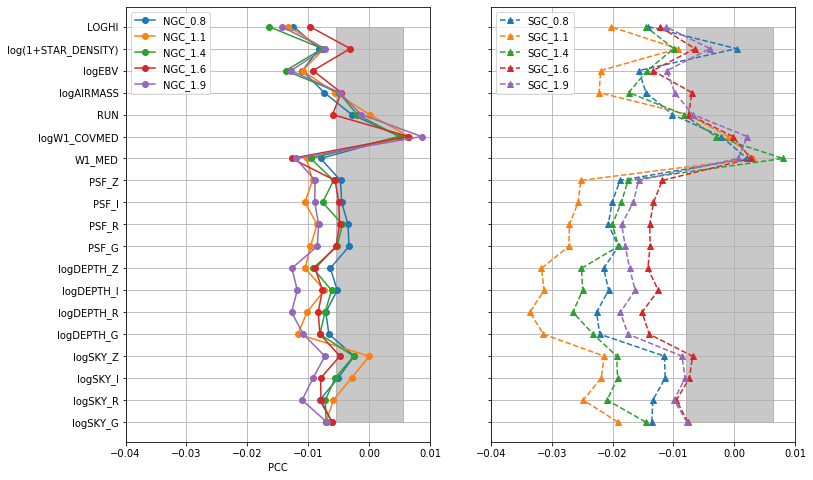

In [52]:
fig, ax = plt.subplots(ncols=2, figsize=(12,8), sharey=True)
for name_i in pcc_all.keys():
    #if 'low' in name_i or 'high' in name_i:
    if 'NGC' in name_i:
        cap='NGC'
        marker='o'
        ls='-'
        j = 0
    elif 'SGC' in name_i:
        cap='SGC'
        marker='^'
        ls='--'
        j = 1
    else:
        marker='.'
    #if 'low' in name_i:
    #    color='r'
    #elif 'high' in name_i:
    #    color='k'
    #else:
    #    color='b'
    ax[j].plot(pcc_all[name_i], featnames, label=name_i, marker=marker, linestyle=ls)
    ax[j].fill_betweenx(x1=np.min(pcc_boost[cap]),
                  x2=np.max(pcc_boost[cap]), 
                  y=np.arange(len(featnames)),
                  color='grey', alpha=0.1)



for axi in ax:
    axi.legend()#bbox_to_anchor=(1.3, 1.))
    axi.set_xlim(-0.04, 0.01)
    axi.grid(True)
    
ax[0].set_xlabel('PCC')
plt.show()    